## 실기 시험(파이썬, 크롤링)

문제1. 내가 사용하는 파이썬 버전은?(10)

In [1]:
import sys
print(sys.version)

3.10.12 (main, Jan 17 2025, 14:35:34) [GCC 11.4.0]


문제2. 내가 사용하는 BeautifulSoup 버전은?(10)

In [2]:
import bs4
bs4.__version__

'4.13.3'

## 논문 정보 크롤링


http://www.riss.kr/search/Search.do?isDetailSearch=N&searchGubun=true&viewYn=OP&query=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B5%90%EC%9C%A1&queryText=&iStartCount=0&iGroupView=5&icate=all&colName=re_a_kor&exQuery=&exQueryText=&order=%2FDESC&onHanja=false&strSort=RANK&pageScale=10&orderBy=&fsearchMethod=search&isFDetailSearch=N&sflag=1&searchQuery=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B5%90%EC%9C%A1&fsearchSort=&fsearchOrder=&limiterList=&limiterListText=&facetList=&facetListText=&fsearchDB=&resultKeyword=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B5%90%EC%9C%A1&pageNumber=1&p_year1=&p_year2=&dorg_storage=&mat_type=&mat_subtype=&fulltext_kind=&t_gubun=&learning_type=&language_code=&ccl_code=&language=&inside_outside=&fric_yn=&image_yn=&regnm=&gubun=&kdc=&ttsUseYn=

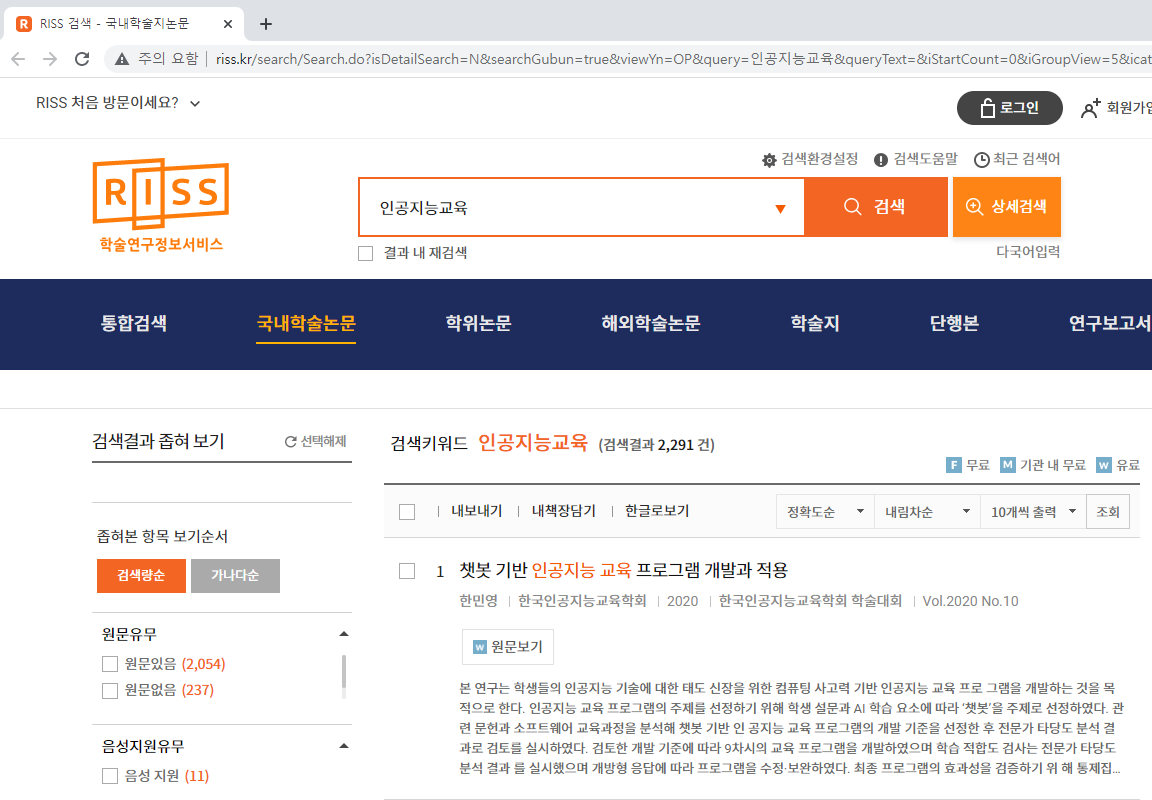

### 논문 10편 모두 크롤링하여 저장하기

In [3]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import time

HEADERS={'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'}

# riss 국내학술논문에서 키워드로 검색한 페이지의 주소를 url 변수에 저장하세요.

url = 'http://www.riss.kr/search/Search.do?isDetailSearch=N&searchGubun=true&viewYn=OP&query=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B5%90%EC%9C%A1&queryText=&iStartCount=0&iGroupView=5&icate=all&colName=re_a_kor&exQuery=&exQueryText=&order=%2FDESC&onHanja=false&strSort=RANK&pageScale=10&orderBy=&fsearchMethod=search&isFDetailSearch=N&sflag=1&searchQuery=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B5%90%EC%9C%A1&fsearchSort=&fsearchOrder=&limiterList=&limiterListText=&facetList=&facetListText=&fsearchDB=&resultKeyword=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B5%90%EC%9C%A1&pageNumber=1&p_year1=&p_year2=&dorg_storage=&mat_type=&mat_subtype=&fulltext_kind=&t_gubun=&learning_type=&language_code=&ccl_code=&language=&inside_outside=&fric_yn=&image_yn=&regnm=&gubun=&kdc=&ttsUseYn='

# requests.get()함수로 가져온 결과를 result에 저장하고 그 결과를 출력해보세요.

result = requests.get(url, headers = HEADERS)
print(result)


# soup 정보를 출력해보세요. 
soup = bs(result.content,'html.parser')

soup

<Response [200]>



<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="no-referrer-when-downgrade" name="referrer">
<meta content="width=device-width" name="viewport"/>
<meta content="telephone=no" name="format-detection"/><!-- 아이폰 전화번호 스타일 초기화 -->
<meta content="Copyright(c) KERIS. ALL RIGHTS  RESERVED" name="copyright"/>
<title>RISS 검색 - 국내학술지논문</title>
<link href="/commons/images/favicon.ico" rel="icon" type="image/x-icon"/>
<link href="/commons/images/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/commons/css/base.css?20220324" rel="stylesheet" type="text/css"/>
<link href="/commons/css/common.css?20220324" rel="stylesheet" type="text/css"/>
<link href="/search/css/search.css?20220324" rel="stylesheet" type="text/css"/>
<link href="/commons/css/jquery.mCustomScrollbar.css?20220324" rel="stylesheet" type="text/css"/>
<link href="/commons/css/relation/dtree.css?20220324" rel="StyleSheet" type="text/

문제3. 논문 리스트(10개)에 해당하는 리스트 가져오기(10)

len()함수를 써서 확인할 것!

In [4]:
papers = soup.select('div.cont.ml60')
len(papers)

10

문제4. 제목, 저자, 학회, 발행년도, 학술지, 원문링크, 초록에 대해 추출하기(30)

```
아래는 추출완료 한 결과 중 일부분입니다. 
각 컬럼의 내용을 확인하여 올바른 css selector를 지정하세요.

초록이 없는 경우는 "초록이 없어요" 라는 문자열을 대체해서 넣으세요.
```

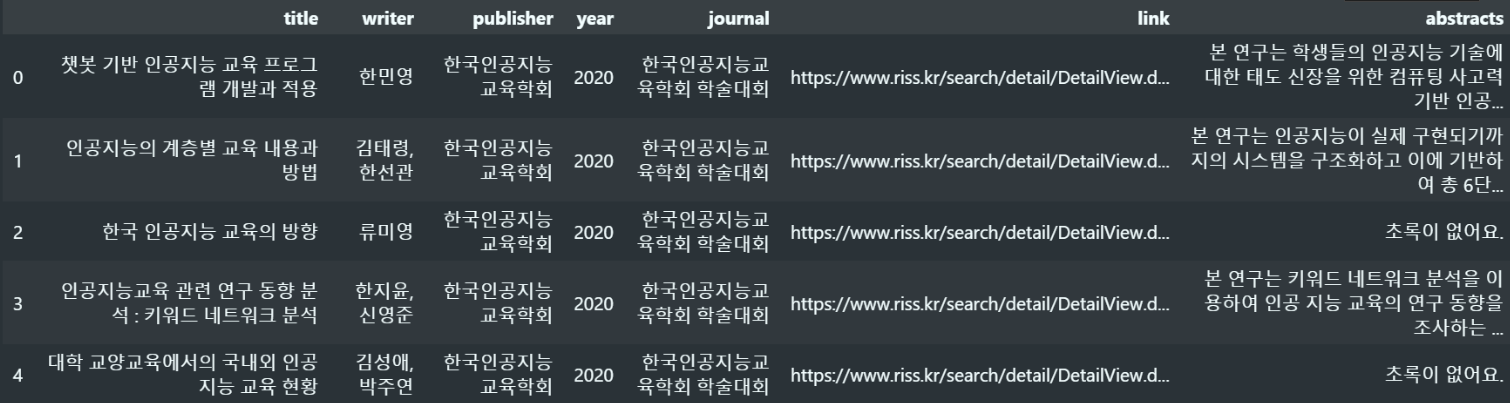

In [5]:
print(papers[0].select_one('p.title').text)
print(papers[0].select_one('p > span').text)
print(papers[0].select_one('.assigned').text)
print(papers[0].select('p > span')[2].text)
print(papers[0].select('p > span')[3].text)
web = 'https://www.riss.kr'
suburl = web + papers[0].select_one('p.title > a')['href']
print(suburl)
print(papers[0].select_one('p.preAbstract').text)

챗봇 기반 인공지능 교육 프로그램 개발과 적용
한민영
한국인공지능교육학회
2020
한국인공지능교육학회 학술대회
https://www.riss.kr/search/detail/DetailView.do?p_mat_type=1a0202e37d52c72d&control_no=d71c7a2ea0ea01c27ecd42904f0c5d65&keyword=인공지능교육
본 연구는 학생들의 인공지능 기술에 대한 태도 신장을 위한 컴퓨팅 사고력 기반 인공지능 교육 프로 그램을 개발하는 것을 목적으로 한다. 인공지능 교육 프로그램의 주제를 선정하기 위해 학생 설문과 AI 학습 요소에 따라 ‘챗봇’을 주제로 선정하였다. 관련 문헌과 소프트웨어 교육과정을 분석해 챗봇 기반 인 공지능 교육 프로그램의 개발 기준을 선정한 후 전문가 타당도 분석 결과로 검토를 실시하였다. 검토한 개발 기준에 따라 9차시의 교육 프로그램을 개발하였으며 학습 적합도 검사는 전문가 타당도 분석 결과 를 실시했으며 개방형 응답에 따라 프로그램을 수정·보완하였다. 최종 프로그램의 효과성을 검증하기 위 해 통제집단 사전사후 실험 설계에 따라 연구를 진행하여 인공지능 기술에 대한 태도의 변화를 살펴보았 다. 그 결과 인공지능 기술에 대한 전체 태도, 인공지능 기술의 성 역할, 인공지능 기술의 접근 용이성과 인공지능 기술 관련 진로 영역에서는 유의미한 향상을 보였다.


In [ ]:
'''
1. 크롤링할 정보의 카테고리를 빈 리스트로 만들어 놓기 
   예) 제목, 저자, 학회, 발행년도, 학술지, 원문링크, 초록 
2. for 반복문 실행하기
3. 각 정보를 찾아서 리스트에 추가하기 .append()
'''
title = []
writer =[]
publisher = []
year = []
journal = []
link = []
abstracts = []

for paper in papers:
   title.append(paper.select_one('p.title').text)               # 제목
   writer.append(paper.select_one('p > span').text)             # 저자
   publisher.append(paper.select_one('.assigned').text)         # 학회
   year.append(paper.select('p > span')[2].text)                # 발행년도
   journal.append(paper.select('p > span')[3].text)             # 학술지
   
   web = 'https://www.riss.kr'
   suburl = web + paper.select_one('p.title > a')['href']       # url 조합
   link.append(suburl)                                          # 원문링크

   try:
      abstracts.append(paper.select_one('p.preAbstract').text)  # 초록
   except AttributeError:
      abstracts.append("초록이 없어요.")

문제5. 수집된 데이터를 데이터 프레임으로 만드세요.(20)

```
아래의 코드를 활용하여 데이터 프레임을 만드세요.
```



In [ ]:
#  pandas DataFrame으로 저장하기
import pandas as pd

df = pd.DataFrame({'title':title,
              "writer":writer,
              "publisher":publisher,
              "year":year,
              "journal":journal,
              "link":link,
              "abstracts":abstracts})

In [16]:
# 데이터프레임을 출력하여 확인해 봅시다. 

df

,title,writer,publisher,year,journal,link,abstracts
0,챗봇 기반 인공지능 교육 프로그램 개발과 적용,한민영,한국인공지능교육학회,2020,한국인공지능교육학회 학술대회,https://www.riss.kr/search/detail/DetailView.d...,본 연구는 학생들의 인공지능 기술에 대한 태도 신장을 위한 컴퓨팅 사고력 기반 인공...
1,한국 인공지능 교육의 방향,류미영,한국인공지능교육학회,2020,한국인공지능교육학회 학술대회,https://www.riss.kr/search/detail/DetailView.d...,초록이 없어요.
2,인공지능의 계층별 교육 내용과 방법,"김태령,한선관",한국인공지능교육학회,2020,한국인공지능교육학회 학술대회,https://www.riss.kr/search/detail/DetailView.d...,본 연구는 인공지능이 실제 구현되기까지의 시스템을 구조화하고 이에 기반하여 총 6단...
3,인공지능교육 관련 연구 동향 분석 : 키워드 네트워크 분석,"한지윤,신영준",한국인공지능교육학회,2020,한국인공지능교육학회 학술대회,https://www.riss.kr/search/detail/DetailView.d...,본 연구는 키워드 네트워크 분석을 이용하여 인공 지능 교육의 연구 동향을 조사하는 ...
4,대학 교양교육에서의 국내외 인공지능 교육 현황,"김성애,박주연",한국인공지능교육학회,2020,한국인공지능교육학회 학술대회,https://www.riss.kr/search/detail/DetailView.d...,초록이 없어요.
5,대학 교양교육에서의 비전공학생을 위한 인공지능 교육 사례,전수진,한국인공지능교육학회,2020,한국인공지능교육학회 학술대회,https://www.riss.kr/search/detail/DetailView.d...,초록이 없어요.
6,인공지능 윤리 가치 요소 중심의 통합적 인공지능 교육 프로그램 개발,김지현,한국인공지능교육학회,2022,한국인공지능교육학회 학술대회,https://www.riss.kr/search/detail/DetailView.d...,초록이 없어요.
7,2022 개정 교육과정 분석을 통한 초등학교 인공지능윤리 교육 프로그램 개발,문상필,한국인공지능교육학회,2022,한국인공지능교육학회 학술대회,https://www.riss.kr/search/detail/DetailView.d...,초록이 없어요.
8,2022 개정 교육과정 분석을 통한 초등학교 인공지능윤리 교육 프로그램 개발,문상필,한국인공지능교육학회,2022,한국인공지능교육학회 학술대회,https://www.riss.kr/search/detail/DetailView.d...,초록이 없어요.
9,인공지능 교육 프로그램 개발 및 적용을 통한 인공지능 역량ㆍ태도ㆍ인식 변화 분석,이동열,한국인공지능교육학회,2022,한국인공지능교육학회 학술대회,https://www.riss.kr/search/detail/DetailView.d...,초록이 없어요.


문제6. 데이터프레임으로 만든 데이터를 파일로 저장하세요.(csv, xlsx) 두가지 버전으로 만들기 (20)
* 폴더명 (5)
    * data 폴더에 저장되도록 한다.

* 파일이름 (5)
    * riss_ai.csv
    * riss_ai.xlsx
* 조건 (10)
    * csv파일을 메모장에서 열었을 때, 한글이 깨지지 않는다.
    * xlsx파일을 엑셀에서 열었을 때, 한글이 깨지지 않는다.
    * 저장시 불필요한 index가 추가되지 않도록 한다. 

In [18]:
import os

folder_name = "data"  # 폴더 이름
os.mkdir(folder_name)
print("폴더 생성")

폴더 생성


In [19]:
df.to_csv('./data/riss_ai.csv')
df.to_excel('./data/riss_ai.xlsx')